In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn


from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

In [2]:
print('Tensorflow version', tf.__version__)

Tensorflow version 2.0.0


In [3]:
data = pd.read_csv('data/mnist/mnist_train.csv')

In [4]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.shape

(60000, 785)

In [6]:
data = data.drop(['label'], axis=1)

In [7]:
data.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data.shape

(60000, 784)

In [9]:
X_train = data[50000:].values.astype('float32')/255
X_test = data[:50000].values.astype('float32')/255

In [10]:
print('Train data shape', X_train.shape)
print('Test data shape', X_test.shape)

Train data shape (10000, 784)
Test data shape (50000, 784)


In [11]:
## Common params
epochs = 250
batch_size = 256

#### Under Complete Linear Autoencoder

In [12]:
n_input = 784
n_hidden = 256
n_output = n_input

##input
input_mg = tf.keras.layers.Input(shape=(n_input,))
##hideen layer or coding layer
encoded = tf.keras.layers.Dense(n_hidden, activation='relu')(input_mg)
##output layer
decoded = tf.keras.layers.Dense(n_output, activation='sigmoid')(encoded)
##model
autoencoder = tf.keras.models.Model(inputs=input_mg, outputs =decoded)


In [13]:
## seperate encoder model
encoder = tf.keras.models.Model(inputs=input_mg, outputs =encoded)

In [14]:
## seperate decoder model
encoded_input = tf.keras.layers.Input(shape=(n_hidden,))
decoder_layer = autoencoder.layers[-1] ## last layer of autoencoder, can we use decoded directly
decoder = tf.keras.models.Model(inputs=encoded_input, outputs =decoder_layer(encoded_input))

In [15]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [16]:
# now let's train our autoencoder for 50 epochs
result_ucla = autoencoder.fit(X_train, X_train, epochs=epochs, batch_size=batch_size, 
                shuffle=True, validation_data=(X_test, X_test))

Train on 10000 samples, validate on 50000 samples
Epoch 1/250
10000/10000 [==============================] - 3s 318us/sample - loss: 0.3582 - val_loss: 0.2345
Epoch 2/250
10000/10000 [==============================] - 2s 217us/sample - loss: 0.2003 - val_loss: 0.1781
Epoch 3/250
10000/10000 [==============================] - 2s 221us/sample - loss: 0.1607 - val_loss: 0.1516
Epoch 4/250
10000/10000 [==============================] - 2s 220us/sample - loss: 0.1396 - val_loss: 0.1347
Epoch 5/250
10000/10000 [==============================] - 2s 225us/sample - loss: 0.1256 - val_loss: 0.1230
Epoch 6/250
10000/10000 [==============================] - 2s 224us/sample - loss: 0.1156 - val_loss: 0.1145
Epoch 7/250
10000/10000 [==============================] - 2s 218us/sample - loss: 0.1081 - val_loss: 0.1082
Epoch 8/250
10000/10000 [==============================] - 2s 223us/sample - loss: 0.1023 - val_loss: 0.1028
Epoch 9/250
10000/10000 [==============================] - 2s 225us/sample - l

10000/10000 [==============================] - 2s 241us/sample - loss: 0.0656 - val_loss: 0.0670
Epoch 76/250
10000/10000 [==============================] - 2s 246us/sample - loss: 0.0655 - val_loss: 0.0669
Epoch 77/250
10000/10000 [==============================] - 2s 249us/sample - loss: 0.0655 - val_loss: 0.0669
Epoch 78/250
10000/10000 [==============================] - 3s 275us/sample - loss: 0.0654 - val_loss: 0.0669
Epoch 79/250
10000/10000 [==============================] - 3s 275us/sample - loss: 0.0654 - val_loss: 0.0668
Epoch 80/250
10000/10000 [==============================] - 2s 244us/sample - loss: 0.0654 - val_loss: 0.0668
Epoch 81/250
10000/10000 [==============================] - 2s 246us/sample - loss: 0.0653 - val_loss: 0.0668
Epoch 82/250
10000/10000 [==============================] - 2s 243us/sample - loss: 0.0653 - val_loss: 0.0667
Epoch 83/250
10000/10000 [==============================] - 2s 246us/sample - loss: 0.0652 - val_loss: 0.0667
Epoch 84/250
10000/1000

10000/10000 [==============================] - 3s 262us/sample - loss: 0.0640 - val_loss: 0.0657
Epoch 150/250
10000/10000 [==============================] - 3s 271us/sample - loss: 0.0640 - val_loss: 0.0657
Epoch 151/250
10000/10000 [==============================] - 3s 268us/sample - loss: 0.0640 - val_loss: 0.0657
Epoch 152/250
10000/10000 [==============================] - 3s 283us/sample - loss: 0.0640 - val_loss: 0.0657
Epoch 153/250
10000/10000 [==============================] - 3s 275us/sample - loss: 0.0640 - val_loss: 0.0657
Epoch 154/250
10000/10000 [==============================] - 3s 265us/sample - loss: 0.0640 - val_loss: 0.0657
Epoch 155/250
10000/10000 [==============================] - 3s 279us/sample - loss: 0.0640 - val_loss: 0.0656
Epoch 156/250
10000/10000 [==============================] - 3s 276us/sample - loss: 0.0639 - val_loss: 0.0656
Epoch 157/250
10000/10000 [==============================] - 3s 254us/sample - loss: 0.0639 - val_loss: 0.0657
Epoch 158/250
1

Epoch 223/250
10000/10000 [==============================] - 3s 253us/sample - loss: 0.0636 - val_loss: 0.0654
Epoch 224/250
10000/10000 [==============================] - 3s 253us/sample - loss: 0.0635 - val_loss: 0.0654
Epoch 225/250
10000/10000 [==============================] - 3s 251us/sample - loss: 0.0636 - val_loss: 0.0655
Epoch 226/250
10000/10000 [==============================] - 3s 251us/sample - loss: 0.0636 - val_loss: 0.0654
Epoch 227/250
10000/10000 [==============================] - 2s 250us/sample - loss: 0.0636 - val_loss: 0.0655
Epoch 228/250
10000/10000 [==============================] - 3s 274us/sample - loss: 0.0636 - val_loss: 0.0654
Epoch 229/250
10000/10000 [==============================] - 3s 272us/sample - loss: 0.0636 - val_loss: 0.0655
Epoch 230/250
10000/10000 [==============================] - 3s 257us/sample - loss: 0.0636 - val_loss: 0.0655
Epoch 231/250
10000/10000 [==============================] - 3s 260us/sample - loss: 0.0636 - val_loss: 0.0654
E

In [17]:
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

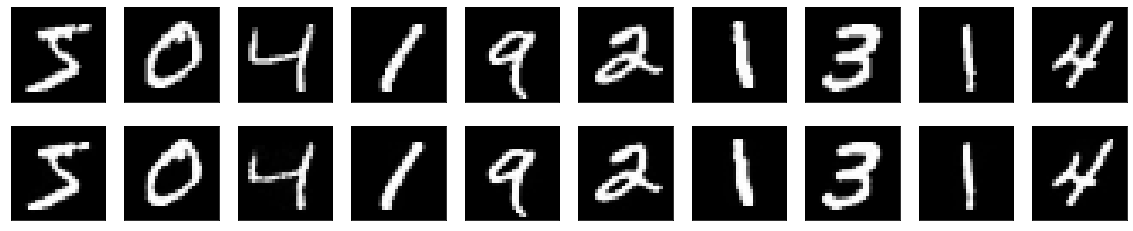

In [18]:
# now using Matplotlib to plot the images
n = 10 # how many images we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

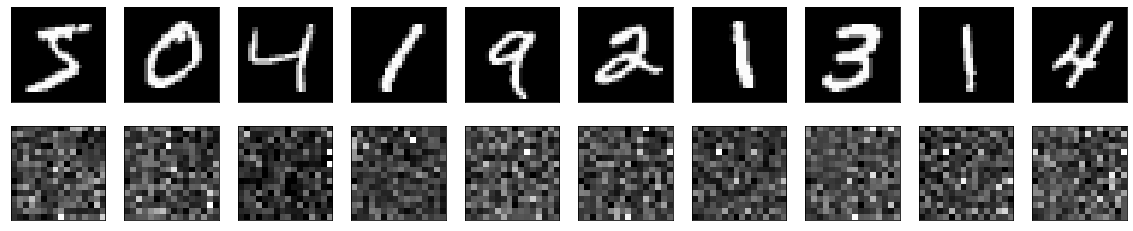

In [19]:
# now using Matplotlib to plot the images
n = 10 # how many images we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(16, 16))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

#### Stacked Autoencoder

In [20]:
n_input = 784
n_hidden_1 = 484
n_hidden_2 = 256
n_hidden_3 = 81
n_output = n_input

##input
input_mg = tf.keras.layers.Input(shape=(n_input,))
##hideen layer or coding layer
encoded_1 = tf.keras.layers.Dense(n_hidden_1, activation='relu')(input_mg)
encoded_2 = tf.keras.layers.Dense(n_hidden_2, activation='relu')(encoded_1)
encoded_3 = tf.keras.layers.Dense(n_hidden_3, activation='relu')(encoded_2)

##output layer
decoded_2 = tf.keras.layers.Dense(n_hidden_2, activation='sigmoid')(encoded_3)
decoded_1 = tf.keras.layers.Dense(n_hidden_1, activation='sigmoid')(decoded_2)
output_mg = tf.keras.layers.Dense(n_output, activation='sigmoid')(decoded_1)
##model
autoencoder = tf.keras.models.Model(inputs=input_mg, outputs =output_mg)

In [21]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [22]:
result_sa =  autoencoder.fit(X_train, X_train, epochs=epochs, batch_size=batch_size, 
                shuffle=True, validation_data=(X_test, X_test))

Train on 10000 samples, validate on 50000 samples
Epoch 1/250
10000/10000 [==============================] - 5s 514us/sample - loss: 0.3167 - val_loss: 0.2650
Epoch 2/250
10000/10000 [==============================] - 4s 413us/sample - loss: 0.2584 - val_loss: 0.2535
Epoch 3/250
10000/10000 [==============================] - 4s 441us/sample - loss: 0.2462 - val_loss: 0.2453
Epoch 4/250
10000/10000 [==============================] - 4s 438us/sample - loss: 0.2391 - val_loss: 0.2354
Epoch 5/250
10000/10000 [==============================] - 5s 459us/sample - loss: 0.2257 - val_loss: 0.2205
Epoch 6/250
10000/10000 [==============================] - 4s 414us/sample - loss: 0.2121 - val_loss: 0.2113
Epoch 7/250
10000/10000 [==============================] - 4s 415us/sample - loss: 0.2042 - val_loss: 0.2021
Epoch 8/250
10000/10000 [==============================] - 4s 432us/sample - loss: 0.1936 - val_loss: 0.1905
Epoch 9/250
10000/10000 [==============================] - 4s 411us/sample - l

10000/10000 [==============================] - 4s 416us/sample - loss: 0.0899 - val_loss: 0.0946
Epoch 76/250
10000/10000 [==============================] - 4s 413us/sample - loss: 0.0895 - val_loss: 0.0948
Epoch 77/250
10000/10000 [==============================] - 4s 423us/sample - loss: 0.0893 - val_loss: 0.0947
Epoch 78/250
10000/10000 [==============================] - 4s 416us/sample - loss: 0.0891 - val_loss: 0.0943
Epoch 79/250
10000/10000 [==============================] - 4s 413us/sample - loss: 0.0888 - val_loss: 0.0939
Epoch 80/250
10000/10000 [==============================] - 4s 414us/sample - loss: 0.0885 - val_loss: 0.0940
Epoch 81/250
10000/10000 [==============================] - 4s 416us/sample - loss: 0.0883 - val_loss: 0.0941
Epoch 82/250
10000/10000 [==============================] - 4s 414us/sample - loss: 0.0881 - val_loss: 0.0936
Epoch 83/250
10000/10000 [==============================] - 4s 431us/sample - loss: 0.0878 - val_loss: 0.0935
Epoch 84/250
10000/1000

10000/10000 [==============================] - 4s 412us/sample - loss: 0.0778 - val_loss: 0.0864
Epoch 150/250
10000/10000 [==============================] - 4s 420us/sample - loss: 0.0777 - val_loss: 0.0865
Epoch 151/250
10000/10000 [==============================] - 4s 412us/sample - loss: 0.0776 - val_loss: 0.0863
Epoch 152/250
10000/10000 [==============================] - 4s 412us/sample - loss: 0.0775 - val_loss: 0.0865
Epoch 153/250
10000/10000 [==============================] - 4s 418us/sample - loss: 0.0775 - val_loss: 0.0861
Epoch 154/250
10000/10000 [==============================] - 4s 415us/sample - loss: 0.0773 - val_loss: 0.0866
Epoch 155/250
10000/10000 [==============================] - 4s 421us/sample - loss: 0.0773 - val_loss: 0.0861
Epoch 156/250
10000/10000 [==============================] - 4s 415us/sample - loss: 0.0771 - val_loss: 0.0860
Epoch 157/250
10000/10000 [==============================] - 4s 413us/sample - loss: 0.0770 - val_loss: 0.0859
Epoch 158/250
1

Epoch 223/250
10000/10000 [==============================] - 4s 422us/sample - loss: 0.0730 - val_loss: 0.0839
Epoch 224/250
10000/10000 [==============================] - 4s 411us/sample - loss: 0.0730 - val_loss: 0.0840
Epoch 225/250
10000/10000 [==============================] - 4s 412us/sample - loss: 0.0730 - val_loss: 0.0839
Epoch 226/250
10000/10000 [==============================] - 4s 414us/sample - loss: 0.0729 - val_loss: 0.0843
Epoch 227/250
10000/10000 [==============================] - 4s 420us/sample - loss: 0.0729 - val_loss: 0.0838
Epoch 228/250
10000/10000 [==============================] - 4s 414us/sample - loss: 0.0728 - val_loss: 0.0839
Epoch 229/250
10000/10000 [==============================] - 4s 411us/sample - loss: 0.0727 - val_loss: 0.0840
Epoch 230/250
10000/10000 [==============================] - 4s 412us/sample - loss: 0.0728 - val_loss: 0.0842
Epoch 231/250
10000/10000 [==============================] - 4s 420us/sample - loss: 0.0727 - val_loss: 0.0836
E

#### Denoised AutoEncoder

In [23]:
noise_level = 0.1
noise = noise_level + np.random.rand(X_train.shape[0],X_train.shape[1])
X_train_noise = X_train + noise

In [24]:
n_input = 784
n_hidden_1 = 484
n_hidden_2 = 256
n_hidden_3 = 81
n_output = n_input

##input
input_mg = tf.keras.layers.Input(shape=(n_input,))
##hideen layer or coding layer
encoded_1 = tf.keras.layers.Dense(n_hidden_1, activation='relu')(input_mg)
encoded_2 = tf.keras.layers.Dense(n_hidden_2, activation='relu')(encoded_1)
encoded_3 = tf.keras.layers.Dense(n_hidden_3, activation='relu')(encoded_2)

##output layer
decoded_2 = tf.keras.layers.Dense(n_hidden_2, activation='sigmoid')(encoded_3)
decoded_1 = tf.keras.layers.Dense(n_hidden_1, activation='sigmoid')(decoded_2)
output_mg = tf.keras.layers.Dense(n_output, activation='sigmoid')(decoded_1)
##model
autoencoder = tf.keras.models.Model(inputs=input_mg, outputs =output_mg)

In [25]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [26]:
result_da = autoencoder.fit(X_train_noise, X_train, epochs=epochs, batch_size=batch_size, 
                shuffle=True, validation_data=(X_test, X_test))

Train on 10000 samples, validate on 50000 samples
Epoch 1/250
10000/10000 [==============================] - 5s 514us/sample - loss: 0.3189 - val_loss: 0.2659
Epoch 2/250
10000/10000 [==============================] - 4s 423us/sample - loss: 0.2624 - val_loss: 0.2642
Epoch 3/250
10000/10000 [==============================] - 4s 437us/sample - loss: 0.2619 - val_loss: 0.2642
Epoch 4/250
10000/10000 [==============================] - 4s 420us/sample - loss: 0.2620 - val_loss: 0.2640
Epoch 5/250
10000/10000 [==============================] - 4s 428us/sample - loss: 0.2619 - val_loss: 0.2637
Epoch 6/250
10000/10000 [==============================] - 4s 417us/sample - loss: 0.2611 - val_loss: 0.2629
Epoch 7/250
10000/10000 [==============================] - 4s 427us/sample - loss: 0.2562 - val_loss: 0.2575
Epoch 8/250
10000/10000 [==============================] - 4s 417us/sample - loss: 0.2452 - val_loss: 0.2641
Epoch 9/250
10000/10000 [==============================] - 4s 429us/sample - l

10000/10000 [==============================] - 5s 460us/sample - loss: 0.1150 - val_loss: 0.2419
Epoch 76/250
10000/10000 [==============================] - 4s 436us/sample - loss: 0.1144 - val_loss: 0.2410
Epoch 77/250
10000/10000 [==============================] - 5s 476us/sample - loss: 0.1141 - val_loss: 0.2467
Epoch 78/250
10000/10000 [==============================] - 4s 432us/sample - loss: 0.1135 - val_loss: 0.2468
Epoch 79/250
10000/10000 [==============================] - 5s 460us/sample - loss: 0.1130 - val_loss: 0.2452
Epoch 80/250
10000/10000 [==============================] - 4s 440us/sample - loss: 0.1124 - val_loss: 0.2453
Epoch 81/250
10000/10000 [==============================] - 5s 453us/sample - loss: 0.1120 - val_loss: 0.2462
Epoch 82/250
10000/10000 [==============================] - 4s 431us/sample - loss: 0.1118 - val_loss: 0.2481
Epoch 83/250
10000/10000 [==============================] - 4s 423us/sample - loss: 0.1112 - val_loss: 0.2452
Epoch 84/250
10000/1000

10000/10000 [==============================] - 5s 472us/sample - loss: 0.0930 - val_loss: 0.2585
Epoch 150/250
10000/10000 [==============================] - 5s 475us/sample - loss: 0.0928 - val_loss: 0.2532
Epoch 151/250
10000/10000 [==============================] - 5s 467us/sample - loss: 0.0926 - val_loss: 0.2531
Epoch 152/250
10000/10000 [==============================] - 5s 456us/sample - loss: 0.0926 - val_loss: 0.2509
Epoch 153/250
10000/10000 [==============================] - 5s 463us/sample - loss: 0.0924 - val_loss: 0.2492
Epoch 154/250
10000/10000 [==============================] - 4s 416us/sample - loss: 0.0922 - val_loss: 0.2593
Epoch 155/250
10000/10000 [==============================] - 4s 433us/sample - loss: 0.0922 - val_loss: 0.2569
Epoch 156/250
10000/10000 [==============================] - 5s 539us/sample - loss: 0.0918 - val_loss: 0.2552
Epoch 157/250
10000/10000 [==============================] - 5s 466us/sample - loss: 0.0918 - val_loss: 0.2578
Epoch 158/250
1

Epoch 223/250
10000/10000 [==============================] - 4s 448us/sample - loss: 0.0844 - val_loss: 0.2581
Epoch 224/250
10000/10000 [==============================] - 4s 434us/sample - loss: 0.0843 - val_loss: 0.2622
Epoch 225/250
10000/10000 [==============================] - 5s 459us/sample - loss: 0.0840 - val_loss: 0.2616
Epoch 226/250
10000/10000 [==============================] - 4s 449us/sample - loss: 0.0841 - val_loss: 0.2580
Epoch 227/250
10000/10000 [==============================] - 5s 470us/sample - loss: 0.0839 - val_loss: 0.2619
Epoch 228/250
10000/10000 [==============================] - 4s 421us/sample - loss: 0.0838 - val_loss: 0.2639
Epoch 229/250
10000/10000 [==============================] - 4s 429us/sample - loss: 0.0838 - val_loss: 0.2608
Epoch 230/250
10000/10000 [==============================] - 4s 449us/sample - loss: 0.0835 - val_loss: 0.2646
Epoch 231/250
10000/10000 [==============================] - 5s 468us/sample - loss: 0.0837 - val_loss: 0.2584
E

#### Sparse Auto Encoder

In [27]:
n_input = 784
n_hidden_1 = 484
n_hidden_2 = 256
n_hidden_3 = 81
n_output = n_input

##input
input_mg = tf.keras.layers.Input(shape=(n_input,))
##hideen layer or coding layer
encoded_1 = tf.keras.layers.Dense(n_hidden_1, activation='relu', activity_regularizer=tf.keras.regularizers.l1())(input_mg)
encoded_2 = tf.keras.layers.Dense(n_hidden_2, activation='relu', activity_regularizer=tf.keras.regularizers.l1())(encoded_1)
encoded_3 = tf.keras.layers.Dense(n_hidden_3, activation='relu', activity_regularizer=tf.keras.regularizers.l1())(encoded_2)

##output layer
decoded_2 = tf.keras.layers.Dense(n_hidden_2, activation='sigmoid', activity_regularizer=tf.keras.regularizers.l1())(encoded_3)
decoded_1 = tf.keras.layers.Dense(n_hidden_1, activation='sigmoid', activity_regularizer=tf.keras.regularizers.l1())(decoded_2)
output_mg = tf.keras.layers.Dense(n_output, activation='sigmoid')(decoded_1)
##model
autoencoder = tf.keras.models.Model(inputs=input_mg, outputs =output_mg)

In [28]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [30]:
result_spa = autoencoder.fit(X_train_noise, X_train, epochs=epochs, batch_size=batch_size, 
                shuffle=True, validation_data=(X_test, X_test))

Train on 10000 samples, validate on 50000 samples
Epoch 1/250
10000/10000 [==============================] - 4s 447us/sample - loss: 0.3854 - val_loss: 0.4012
Epoch 2/250
10000/10000 [==============================] - 5s 504us/sample - loss: 0.3837 - val_loss: 0.3995
Epoch 3/250
10000/10000 [==============================] - 5s 492us/sample - loss: 0.3820 - val_loss: 0.3979
Epoch 4/250
10000/10000 [==============================] - 5s 455us/sample - loss: 0.3804 - val_loss: 0.3962
Epoch 5/250
10000/10000 [==============================] - 5s 524us/sample - loss: 0.3788 - val_loss: 0.3946
Epoch 6/250
10000/10000 [==============================] - 5s 494us/sample - loss: 0.3772 - val_loss: 0.3931
Epoch 7/250
10000/10000 [==============================] - 5s 535us/sample - loss: 0.3756 - val_loss: 0.3915
Epoch 8/250
10000/10000 [==============================] - 5s 471us/sample - loss: 0.3741 - val_loss: 0.3900
Epoch 9/250
10000/10000 [==============================] - 4s 450us/sample - l

10000/10000 [==============================] - 5s 457us/sample - loss: 0.3069 - val_loss: 0.3233
Epoch 76/250
10000/10000 [==============================] - 5s 468us/sample - loss: 0.3062 - val_loss: 0.3226
Epoch 77/250
10000/10000 [==============================] - 5s 483us/sample - loss: 0.3056 - val_loss: 0.3220
Epoch 78/250
10000/10000 [==============================] - 5s 493us/sample - loss: 0.3049 - val_loss: 0.3214
Epoch 79/250
10000/10000 [==============================] - 5s 469us/sample - loss: 0.3043 - val_loss: 0.3207
Epoch 80/250
10000/10000 [==============================] - 5s 511us/sample - loss: 0.3037 - val_loss: 0.3201
Epoch 81/250
10000/10000 [==============================] - 5s 500us/sample - loss: 0.3031 - val_loss: 0.3195
Epoch 82/250
10000/10000 [==============================] - 5s 471us/sample - loss: 0.3025 - val_loss: 0.3189
Epoch 83/250
10000/10000 [==============================] - 5s 485us/sample - loss: 0.3019 - val_loss: 0.3183
Epoch 84/250
10000/1000

10000/10000 [==============================] - 5s 461us/sample - loss: 0.2753 - val_loss: 0.2919
Epoch 150/250
10000/10000 [==============================] - 4s 445us/sample - loss: 0.2750 - val_loss: 0.2917
Epoch 151/250
10000/10000 [==============================] - 4s 445us/sample - loss: 0.2748 - val_loss: 0.2914
Epoch 152/250
10000/10000 [==============================] - 5s 476us/sample - loss: 0.2745 - val_loss: 0.2912
Epoch 153/250
10000/10000 [==============================] - 5s 470us/sample - loss: 0.2743 - val_loss: 0.2909
Epoch 154/250
10000/10000 [==============================] - 5s 485us/sample - loss: 0.2741 - val_loss: 0.2907
Epoch 155/250
10000/10000 [==============================] - 5s 463us/sample - loss: 0.2738 - val_loss: 0.2905
Epoch 156/250
10000/10000 [==============================] - 4s 447us/sample - loss: 0.2736 - val_loss: 0.2903
Epoch 157/250
10000/10000 [==============================] - 5s 456us/sample - loss: 0.2734 - val_loss: 0.2900
Epoch 158/250
1

Epoch 223/250
10000/10000 [==============================] - 5s 451us/sample - loss: 0.2647 - val_loss: 0.2815
Epoch 224/250
10000/10000 [==============================] - 5s 451us/sample - loss: 0.2646 - val_loss: 0.2814
Epoch 225/250
10000/10000 [==============================] - 4s 438us/sample - loss: 0.2646 - val_loss: 0.2813
Epoch 226/250
10000/10000 [==============================] - 4s 443us/sample - loss: 0.2645 - val_loss: 0.2813
Epoch 227/250
10000/10000 [==============================] - 5s 460us/sample - loss: 0.2644 - val_loss: 0.2812
Epoch 228/250
10000/10000 [==============================] - 5s 457us/sample - loss: 0.2644 - val_loss: 0.2811
Epoch 229/250
10000/10000 [==============================] - 4s 450us/sample - loss: 0.2643 - val_loss: 0.2811
Epoch 230/250
10000/10000 [==============================] - 4s 431us/sample - loss: 0.2643 - val_loss: 0.2810
Epoch 231/250
10000/10000 [==============================] - 4s 435us/sample - loss: 0.2642 - val_loss: 0.2810
E

In [40]:
result_spa.history['loss']

[0.3853996170043945,
 0.3836963624954224,
 0.38202127103805544,
 0.38037659397125245,
 0.37875699772834776,
 0.37716308116912844,
 0.37559936685562134,
 0.3740597554683685,
 0.37254601674079896,
 0.3710579041481018,
 0.3695930464744568,
 0.3681502846240997,
 0.36673199281692503,
 0.36533606462478635,
 0.36395331535339354,
 0.36259328179359435,
 0.36125131211280825,
 0.35992978014945987,
 0.35862258157730104,
 0.35733432302474977,
 0.35606333513259886,
 0.35481020970344546,
 0.3535728016853332,
 0.35235345554351805,
 0.35115041484832765,
 0.34996576681137087,
 0.34879623074531557,
 0.34763786897659305,
 0.34650133085250856,
 0.3453714077949524,
 0.34426118226051333,
 0.343164639377594,
 0.3420818314552307,
 0.341016041135788,
 0.3399609907627106,
 0.3389195259094238,
 0.33789250664710996,
 0.33687637729644776,
 0.335876868724823,
 0.3348860373497009,
 0.3339103850841522,
 0.3329454431056976,
 0.3319939807891846,
 0.33105324277877807,
 0.33012230644226076,
 0.32920617303848265,
 0.328298

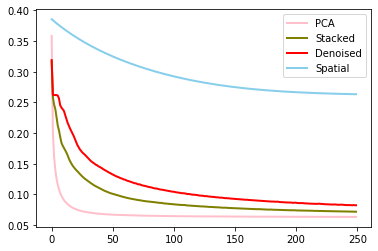

In [53]:
plt.plot(  result_ucla.history['loss'], marker='', color='pink', linewidth=2, label='PCA')
plt.plot(  result_sa.history['loss'], marker='', color='olive', linewidth=2, label = 'Stacked')
plt.plot(  result_da.history['loss'], marker='', color='red', linewidth=2, label='Denoised')
plt.plot(  result_spa.history['loss'], marker='', color='skyblue', linewidth=2, label='Spatial')
plt.legend()